# 🏫 **AICE Associate 최종 실전 모의고사 2**


## **온라인 교육 플랫폼 회원 이탈 예측**

**[비즈니스 시나리오]**

> 당신은 온라인 교육 플랫폼 **'에듀-업(Edu-Up)'**의 데이터 분석가입니다. 1년 동안 분기별로 수집된 회원 데이터를 바탕으로, 어떤 회원이 서비스를 **이탈(churn)할 가능성이 높은지 예측**하는 모델을 개발해야 합니다. 이 모델을 통해 이탈 가능성이 높은 회원에게는 선제적인 조치를 취하여 이탈률을 낮추고자 합니다.



**[데이터셋 소개]**
* `q1_data.xlsx`: 1분기 회원 데이터
* `q2_data.xlsx`: 2분기 회원 데이터
* `q3_data.xlsx`: 3분기 회원 데이터
* `q4_data.xlsx`: 4분기 회원 데이터
* **모든 파일은 동일한 컬럼 구조를 가집니다.**

**[컬럼 설명]**
- **age**: 사용자 나이 (일부 결측값 있음)
- **salary**: 사용자의 연간 추정 소득 (단위: 원)
- **experience_years**: 해당 분야 또는 업무 경력 (년 단위)
- **weekly_study_hours**: 주당 평균 학습 시간 (시간)
- **courses_completed**: 수강 완료한 강의 수
- **login_days_past30**: 최근 30일 간 로그인한 총 일수
- **membership**: 회원 등급 (예: basic, premium 등)
- **device**: 주 사용 기기 (예: desktop, mobile, tablet)
- **region**: 거주 지역 (예: 서울특별시, 경기도 등)
- **promo_opt_in**: 마케팅 수신 동의 여부 (1: 동의, 0: 비동의)
- **num_promo_emails_last3m**: 최근 3개월간 받은 프로모션 이메일 수
- **churn**: 이탈 여부 (1: 이탈, 0: 유지) → **Target**

---

## **문제 1. 아래 지시사항에 따라 분기별 데이터를 불러와 하나의 데이터프레임으로 통합하시오.**
**(1) 데이터 로드**
-   `pandas` 라이브러리를 `pd` 별칭으로 임포트
-   다음 4개의 엑셀 파일을 각각 데이터프레임으로 로드
    -   `q1_data.xlsx`
    -   `q2_data.xlsx`
    -   `q3_data.xlsx`
    -   `q4_data.xlsx`

**(2) 데이터 통합 및 확인**
-   `pd.concat()`을 사용하여 4개의 데이터프레임을 수직으로 통합하고 `df` 변수에 저장
-   인덱스가 재설정되도록 `ignore_index=True` 옵션 적용
-   통합된 `df`의 전체 행과 열의 개수(`shape`)를 출력하여 최종 결과 확인


In [1]:
# 여기에 코드를 작성하세요.

In [2]:
# 문제 1 정답 코드
import pandas as pd

# (1) 데이터 로드
df_q1 = pd.read_excel('q1_data.xlsx')
df_q2 = pd.read_excel('q2_data.xlsx')
df_q3 = pd.read_excel('q3_data.xlsx')
df_q4 = pd.read_excel('q4_data.xlsx')

# (2) 데이터 통합
df = pd.concat([df_q1, df_q2, df_q3, df_q4], ignore_index=True)


## **문제 2. 아래 지시사항에 따라 타겟 변수의 분포를 확인하고 문제 유형을 판단하시오.**
**(1) 타겟 변수 분포 시각화**
- `seaborn` 라이브러리를 `sns` 별칭으로 임포트
- `sns.countplot`을 사용하여 타겟 변수인 `churn`의 분포를 시각화

**(2) 문제 유형 판별**
- 타겟 변수 `churn`의 데이터 형태(0:유지, 1:이탈)를 보고, 이 문제의 유형이 '회귀'와 '분류' 중 무엇인지 판단
- `답안02` 변수에 문자열로 저장

In [3]:
# 여기에 코드를 작성하세요.

문제 유형: 분류


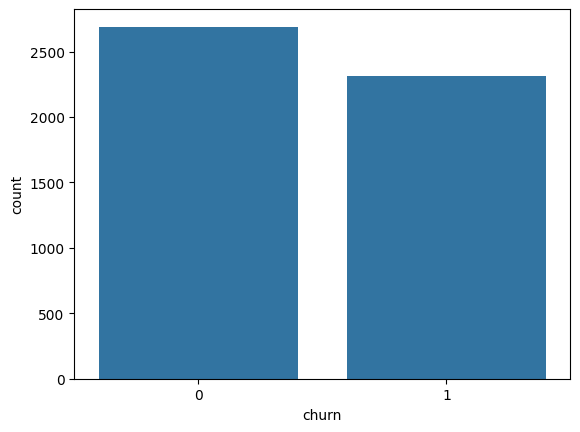

In [4]:
import seaborn as sns

sns.countplot(data=df, x='churn')

# 문제 유형 판별
# 타겟 변수가 0(유지)과 1(이탈) 두 가지 범주로 구성되어 있으므로 분류 문제입니다.
답안02 = '분류'
print(f"문제 유형: {답안02}")

## **문제 3. 아래 지시사항에 따라 회원 등급과 이탈의 관계를 분석하시오.**


-   `pd.crosstab` 함수를 사용하여 `df`의 `membership`과 `churn` 컬럼 간의 교차표를 생성
-   생성된 교차표를 바탕으로 아래 공식을 참고하여 **'vip' 등급 회원들의 이탈률(%)**을 계산
    -   `(이탈률 = 이탈(1)한 'vip' 회원 수 / 전체 'vip' 회원 수 * 100)`
-   계산된 이탈률을 소수점 둘째 자리까지 반올림하여 `답안03` 변수에 저장

In [5]:
# 여기에 코드를 작성하세요.

In [6]:
# membership과 churn 간의 교차표 생성
cross_tab = pd.crosstab(df['membership'], df['churn'])
print(cross_tab)

# 'vip' 등급의 이탈률 계산
vip_churn_rate = (cross_tab.loc['vip', 1] / cross_tab.loc['vip'].sum()) * 100

답안03 = round(vip_churn_rate, 2)
답안03

churn          0     1
membership            
basic       1079  1966
premium     1216   253
vip          395    91


np.float64(18.72)

## **문제 4. 아래 지시사항에 따라 결측치를 처리하시오.**
데이터의 품질을 높이기 위해, 각 컬럼의 의미에 맞는 대표값으로 결측치를 채웁니다.

-   처리 전 `df`의 컬럼별 결측치 개수를 출력하여 확인
-   `age` 컬럼의 결측치는 `age` 컬럼 전체의 **평균(mean)**으로 채우되, 소수점은 버리고 **정수**로 변환하여 적용
-   `salary` 컬럼의 결측치는 `salary` 컬럼 전체의 **중앙값(median)**으로 채우기
-   `weekly_study_hours` 컬럼의 결측치는 **0**으로 채우기
-   모든 변경사항은 원본 `df`에 바로 반영
-   처리 후 `df`의 컬럼별 결측치 개수를 다시 출력하여 모두 처리되었는지 최종 확인

In [7]:
# 여기에 코드를 작성하세요.

In [8]:
print("\n처리 후 결측치 개수:")
print(df.isnull().sum())

# age 결측치 처리 (평균값)
mean_age = df['age'].mean()
df['age'] = df['age'].fillna(int(mean_age))

# salary 결측치 처리 (중앙값)
median_salary = df['salary'].median()
df['salary'] = df['salary'].fillna(median_salary)

# weekly_study_hours 결측치 처리 (0)
df['weekly_study_hours'] = df['weekly_study_hours'].fillna(0)

print("\n처리 후 결측치 개수:")
print(df.isnull().sum())


처리 후 결측치 개수:
age                        909
salary                     140
experience_years             0
weekly_study_hours          94
courses_completed            0
login_days_past30            0
membership                   0
device                       0
region                       0
promo_opt_in                 0
num_promo_emails_last3m      0
churn                        0
dtype: int64

처리 후 결측치 개수:
age                        0
salary                     0
experience_years           0
weekly_study_hours         0
courses_completed          0
login_days_past30          0
membership                 0
device                     0
region                     0
promo_opt_in               0
num_promo_emails_last3m    0
churn                      0
dtype: int64


In [9]:
#다른 코드 스타일
df.fillna({'age':int(df['age'].mean()),
           'salary':df['salary'].median(),
           'weekly_study_hours':0},inplace=True)

## **문제 5. 아래 지시사항에 따라 데이터를 인코딩하시오.**
- `df`의 범주형 컬럼(`membership`, `device`, `region`)에 대해 **원-핫 인코딩**을 수행
- 불필요한 정보 중복을 막기 위해 `drop_first=True` 옵션 사용
- 인코딩된 데이터프레임을 `df_encoded` 변수에 저장


In [10]:
# 여기에 코드를 작성하세요.

In [11]:
df_encoded = pd.get_dummies(df, columns=['membership', 'device', 'region'], drop_first=True)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   float64
 1   salary                   5000 non-null   float64
 2   experience_years         5000 non-null   int64  
 3   weekly_study_hours       5000 non-null   float64
 4   courses_completed        5000 non-null   int64  
 5   login_days_past30        5000 non-null   int64  
 6   promo_opt_in             5000 non-null   int64  
 7   num_promo_emails_last3m  5000 non-null   int64  
 8   churn                    5000 non-null   int64  
 9   membership_premium       5000 non-null   bool   
 10  membership_vip           5000 non-null   bool   
 11  device_mobile            5000 non-null   bool   
 12  device_tablet            5000 non-null   bool   
 13  region_광주광역시             5000 non-null   bool   
 14  region_대구광역시            

## **문제 6. 아래 지시사항에 따라 피처(X)와 타겟(y)을 분리하시오.**
- `df_encoded` 데이터프레임에서 `churn` 컬럼은 `y` 변수에 저장
- `churn`을 제외한 나머지 모든 컬럼은 `X` 변수에 저장



In [12]:
# 여기에 코드를 작성하세요.

In [13]:
# 피처(X)와 타겟(y) 분리
y = df_encoded['churn']
X = df_encoded.drop('churn', axis=1)

X.shape,y.shape


((5000, 19), (5000,))

## **문제 7. 아래 지시사항에 따라 데이터셋을 분할하시오.**
-   `sklearn.model_selection`에서 `train_test_split` 함수를 임포트
-   앞서 준비한 `X`와 `y` 데이터를 **7:3 비율**로 분할
-   재현성을 위해 `random_state=42`로 설정
-   타겟 변수(`y`)의 클래스 비율이 훈련 데이터와 테스트 데이터에 동일하게 유지되도록 옵션 추가
-   분할된 데이터는 각각 `X_train`, `X_test`, `y_train`, `y_test` 변수에 저장





In [14]:
# 여기에 코드를 작성하세요.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (3500, 19)
X_test shape: (1500, 19)


## **문제 8. 아래 지시사항에 따라 피처 스케일링을 수행하시오.**
이상치(Outlier)의 영향을 적게 받는 `RobustScaler`를 사용하여, 모델이 더 안정적으로 학습할 수 있도록 피처 데이터의 스케일을 조정합니다.

-   `RobustScaler` 객체를 생성하여 `scaler` 변수에 저장
-   훈련 데이터(`X_train`)를 기준으로 `scaler`를 학습(`fit`)시키고 동시에 변환(`transform`)하여, 그 결과를 `X_train_scaled`에 저장
-   테스트 데이터(`X_test`)에는 학습된 `scaler`를 그대로 사용하여 변환(`transform`)만 수행하고, 그 결과를 `X_test_scaled`에 저장

In [16]:
# 여기에 코드를 작성하세요.

In [17]:
from sklearn.preprocessing import RobustScaler

# 스케일러 생성 및 적용
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **문제 9. 아래 지시사항에 따라 3가지 머신러닝 모델을 생성하고 학습시키시오.**
- **문제 2**에서 파악한 문제 유형에 맞는 3가지 머신러닝 모델을 `X_train_scaled`, `y_train` 데이터로 학습시키시오.
  1. **선형 (Linear) 분류 모델** (random_state=42)
  2. **랜덤 포레스트 (Random Forest) 분류 모델** (random_state=42)
  3. **XGBoost 분류 모델** (random_state=42)
    - XGBoost 모델 사용 시 `eval_metric='logloss'` 파라미터를 추가로 설정

In [18]:
# 여기에 코드를 작성하세요.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# 모델 생성
lr_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# 모델 학습
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## **문제 10. 아래 지시사항에 따라 학습된 모델들의 성능을 비교하고 최적 모델을 선정하시오.**
**(1) 모델 성능 평가**
- 학습된 세 모델을 `X_test_scaled` 데이터로 예측하고,
- **Accuracy(정확도)**와 **F1 Score** 지표로 각각의 성능을 평가

**(2) 최적 모델 선정**
- 세 모델 중 **F1 Score가 가장 높은 최적 모델의 이름(클래스 이름 그대로)**을 `답안10_1`에 저장.
- 해당 모델의 **F1 Score 값**을 `답안10_2`에 저장

In [20]:
# 여기에 코드를 작성하세요.

In [21]:
from sklearn.metrics import accuracy_score, f1_score

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("lr",accuracy_score(y_test,y_pred_lr), f1_score(y_test,y_pred_lr))
print("rf",accuracy_score(y_test,y_pred_rf), f1_score(y_test,y_pred_rf))
print("xgb",accuracy_score(y_test,y_pred_xgb), f1_score(y_test,y_pred_xgb))

답안10_1 = "XGBClassifier"
답안10_2 = f1_score(y_test,y_pred_xgb)

print(f"최적 모델: {답안10_1}, F1 Score: {답안10_2}")

lr 0.8933333333333333 0.886039886039886
rf 0.994 0.9934924078091106
xgb 0.9953333333333333 0.9949604031677466
최적 모델: XGBClassifier, F1 Score: 0.9949604031677466


## **문제 11. 아래 지시사항에 따라 이진 분류를 위한 딥러닝 모델을 설계하시오.**
- 아래와 같이 딥러닝 아키텍쳐를 설계하고 `dl_model` 변수에 저장
  

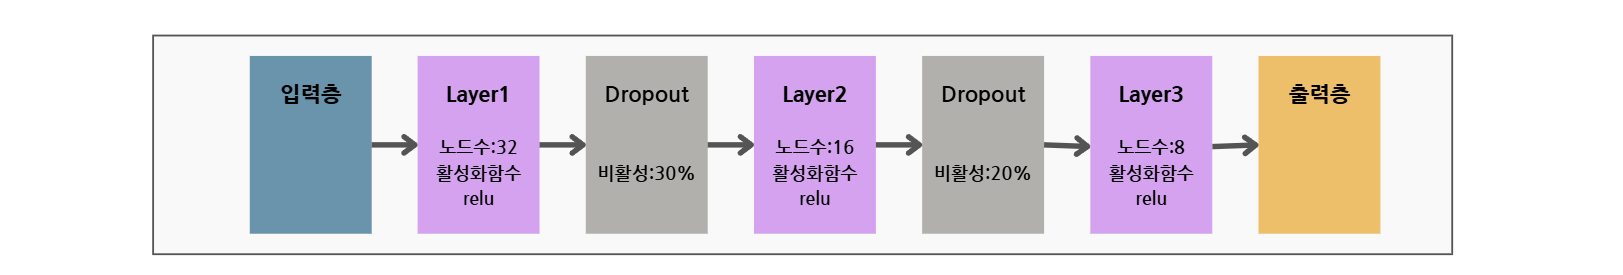

In [22]:
# 여기에 코드를 작성하세요.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

dl_model = Sequential()
dl_model.add(Dense(units=32, activation='relu',input_shape=[X_train_scaled.shape[1]]))
dl_model.add(Dropout(0.3))
dl_model.add(Dense(units=16, activation='relu'))
dl_model.add(Dropout(0.2))
dl_model.add(Dense(units=8, activation='relu'))
dl_model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

## **문제 12. 아래 지시사항에 따라 Callback을 설정하고 모델을 컴파일하시오.**
**(1) Callback 설정**
- `EarlyStopping`: 검증 손실(`val_loss`)이 10 epoch 동안 개선되지 않으면 학습을 조기 종료하도록 설정하시오 (`patience=10`).
- `ModelCheckpoint`: 검증 정확도(`val_accuracy`)가 가장 높은 **최적의 모델**을 `'best_churn_model.keras'` 파일로 저장하도록 설정하시오.

**(2) 모델 컴파일**
-   앞서 생성한 `dl_model`에 대해, 다음 조건으로 컴파일
    -   `optimizer`: 'adam'
    -   `loss`: 이진 분류 문제에 맞는 손실함수 설정
    -   `metrics`: `['accuracy']`


In [24]:
# 여기에 코드를 작성하세요.
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_checkpoint = ModelCheckpoint('best_churn_model.keras', monitor='val_accuracy', save_best_only=True)

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



---

## **문제 13. 아래 지시사항에 따라 딥러닝 모델을 학습시키시오.**
최종적으로, 준비된 데이터와 콜백을 사용하여 `dl_model`을 학습시키고 그 과정을 `history` 변수에 기록합니다.

-   `dl_model`을 `X_train_scaled`, `y_train` 데이터로 학습
-   `epochs`는 100, `batch_size`는 32로 설정
-   `validation_data`로 `X_test_scaled`, `y_test`를 사용
-   **문제 12**에서 설정한 `early_stopping`과 `model_checkpoint` 콜백을 모두 적용
-   학습 과정의 기록을 `history` 변수에 저장



In [26]:
# 여기에 코드를 작성하세요.

In [27]:
history = dl_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stopping, model_checkpoint],
    # verbose=0 # 학습 과정 출력 생략
)


Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4990 - loss: 0.7133 - val_accuracy: 0.6407 - val_loss: 0.6670
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6382 - loss: 0.6522 - val_accuracy: 0.8060 - val_loss: 0.5009
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7537 - loss: 0.5076 - val_accuracy: 0.8813 - val_loss: 0.3168
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8456 - loss: 0.3693 - val_accuracy: 0.9040 - val_loss: 0.2448
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8694 - loss: 0.3009 - val_accuracy: 0.9033 - val_loss: 0.2217
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8835 - loss: 0.2678 - val_accuracy: 0.9207 - val_loss: 0.1925
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8936 - loss: 0.2554 - val_accuracy: 0.9273 - val_loss: 0.1729
Epoch 8/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9085 - loss: 0.2245 - val_ac

## **문제 14. 아래 지시사항에 따라 딥러닝 모델의 학습 과정을 시각화하고 평가하시오.**
**(1) 학습 과정 시각화**
-   `matplotlib.pyplot`을 `plt` 별칭으로 임포트
-   `history` 객체를 사용하여 epoch에 따른 **훈련 정확도(`accuracy`)**와 **검증 정확도(`val_accuracy`)**의 변화를 하나의 선 그래프로 시각화
-   그래프의 범례, x축/y축 라벨을 적절하게 추가

**(2) 최적 모델 평가**
-   `tensorflow.keras.models`에서 `load_model` 함수를 임포트
-   **문제 12**에서 `ModelCheckpoint`로 저장한 최적 모델(`'best_churn_model.keras'`)을 불러오기
-   불러온 모델을 `X_test_scaled`와 `y_test` 데이터로 평가(`.evaluate()`)
-   평가 결과로 나온 여러 값 중, **정확도(accuracy)** 값만 `답안14` 변수에 저장


In [28]:
# 여기에 코드를 작성하세요.

0.987333357334137

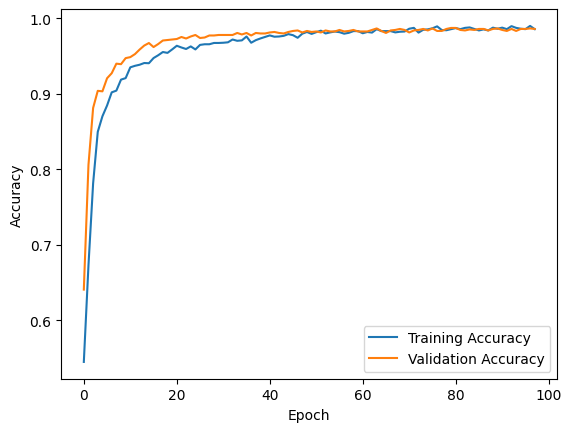

In [29]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

loaded_model = load_model('best_churn_model.keras')
loss, accuracy = loaded_model.evaluate(X_test_scaled, y_test, verbose=0)
답안14 = accuracy
답안14


## **문제 15. 아래 지시사항에 따라 새로운 고객의 이탈 여부를 예측하시오.**
최종적으로, 저장된 최적의 모델을 활용하여 **새로운 고객 한 명**의 이탈 여부를 예측합니다.

-   `tensorflow.keras.models`에서 `load_model` 함수를 임포트
-   **문제 12**에서 저장한 최적 모델(`'best_churn_model.keras'`)을 불러오기
-   아래 `sample_data`는 **이미 스케일링 처리가 완료된** 새로운 고객의 정보입니다. 이 데이터에 대해 이탈 확률을 예측
-   예측된 확률이 **0.5 이상이면 1(이탈), 미만이면 0(유지)**으로 변환하여 최종 예측 결과를 `답안15` 변수에 저장




In [32]:
# 여기에 코드를 작성하세요.
from tensorflow.keras.models import load_model
import numpy as np
sample_data = [[1.0, 0.97, 1.27, -0.19, -1.0, -1.15, 0.0, -0.75, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]


In [33]:
from tensorflow.keras.models import load_model
import numpy as np
sample_data = [[1.0, 0.97, 1.27, -0.19, -1.0, -1.15, 0.0, -0.75, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]

# 이탈 확률 예측
loaded_model = load_model('best_churn_model.keras')
prediction_proba = loaded_model.predict(np.array(sample_data))[0][0]

# 최종 예측 (0 또는 1)
답안15 = 1 if prediction_proba >= 0.5 else 0

print(f"새로운 고객의 이탈 확률: {prediction_proba:.4f}")
print(f"최종 이탈 예측 (0:유지, 1:이탈): {답안15}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
새로운 고객의 이탈 확률: 0.0000
최종 이탈 예측 (0:유지, 1:이탈): 0
